# F-mu-F
 
 The well known F-mu-F signal identified by J.H.Brewer et al. in PRB 33 11 (1986):
 
 $G(t)=\frac{1}{6}\left[3+\cos(\sqrt{3} \omega_\text{D} t)+\left(1-\frac{1}{\sqrt{3}}\right)\cos(\frac{3-\sqrt{3}}{2}\omega_\text{D} t)+\left(1+\frac{1}{\sqrt{3}}\right)\cos(\frac{3+\sqrt{3}}{2}\omega_\text{D} t)\right]$

In [1]:
# Importing stuff...
try:
    from undi import MuonNuclearInteraction
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../undi')
    from undi import MuonNuclearInteraction
import matplotlib.pyplot as plt
import numpy as np

Let us consider a linear F-Mu-F molecule of total length $2r$ aligned along $z$.
 
 Remember that UNDI uses SI units.

INFO:undi.undi:Using most abundand isotope for F, i.e. 19F, 1.0 abundance
INFO:undi.undi:Using most abundand isotope for F, i.e. 19F, 1.0 abundance
INFO:undi.undi:Hilbert space is 8 dimensional
INFO:undi.undi:Adding interaction between F and mu with distance 1.17e-10
INFO:undi.undi:Dipolar contribution between 0<->1, r=1.17e-10
INFO:undi.undi:Skipped interaction between F and F with distance 2.34e-10
INFO:undi.undi:Adding interaction between mu and F with distance 1.17e-10
INFO:undi.undi:Dipolar contribution between 1<->2, r=1.17e-10
INFO:undi.undi:Storing kets in dense matrices
INFO:undi.undi:Adding signal 0...
INFO:undi.undi:Adding signal 1...
INFO:undi.undi:Adding signal 2...
INFO:undi.undi:Adding signal 3...
INFO:undi.undi:Adding signal 4...
INFO:undi.undi:Adding signal 5...
INFO:undi.undi:Adding signal 6...
INFO:undi.undi:Adding signal 7...
INFO:undi.undi:Using most abundand isotope for F, i.e. 19F, 1.0 abundance
INFO:undi.undi:Using most abundand isotope for F, i.e. 19F, 1.0 abun

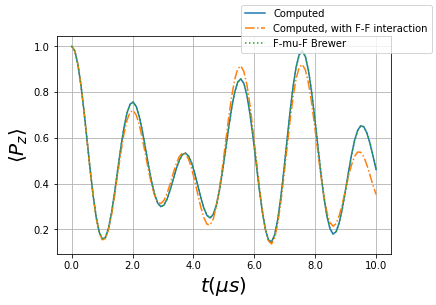

In [2]:
angtom=1.0e-10 # m
h=6.6260693e-34 # Js
hbar=h/(2*np.pi) # Js
mu_0=(4e-7)*np.pi # Tm A-1

# This is a linear F-mu-F along z
r=1.17 * angtom
atoms = [
            {'Position': np.array([0., 0., 0.]),
            'Label': 'F'},
            
            {'Position': np.array([0., 0., r ]),
            'Label': 'mu'},
            
            {'Position': np.array([0., 0., 2*r]),
            'Label': 'F'}
        ]
# Time values, in seconds
tlist = np.linspace(0, 10e-6, 100)

# Define main class
NS = MuonNuclearInteraction(atoms)
# cutoff the dipolar interaction in order to avoid F-F term,
# Rotate sample such that axis z used to define the atomic positions
# is aligned with quantization axis which also happens to be z.
# Basically the next call will do nothing
NS.translate_rotate_sample_vec([0,0,1])

# cutoff the dipolar interaction in order to avoid F-F term
signal_FmuF = NS.polarization(tlist, cutoff=1.2 * angtom)

NS = MuonNuclearInteraction(atoms, log_level='info')
NS.translate_rotate_sample_vec([0,1,0])
signal_FmuF += NS.polarization(tlist, cutoff=1.2 * angtom)

NS = MuonNuclearInteraction(atoms, log_level='info')
NS.translate_rotate_sample_vec([1,0,0])
signal_FmuF += NS.polarization(tlist, cutoff=1.2 * angtom)

signal_FmuF /= 3.

# no cutoff this time
NS = MuonNuclearInteraction(atoms, log_level='info')
NS.translate_rotate_sample_vec([0,0,1])
signal_FmuF_with_Fdip = NS.polarization(tlist)

NS = MuonNuclearInteraction(atoms, log_level='info')
NS.translate_rotate_sample_vec([0,1,0])
signal_FmuF_with_Fdip += NS.polarization(tlist)

NS = MuonNuclearInteraction(atoms, log_level='info')
NS.translate_rotate_sample_vec([1,0,0])
signal_FmuF_with_Fdip += NS.polarization(tlist)

signal_FmuF_with_Fdip /= 3.

####################
# Plot the results #
####################
fig, axes = plt.subplots(1,1)
axes.plot(tlist, signal_FmuF, label='Computed', linestyle='-')
axes.plot(tlist, signal_FmuF_with_Fdip, label='Computed, with F-F interaction', linestyle='-.')

# Generate and plot analytical version for comparison
def plot_brewer(interval,r):
    from numpy import cos, sin, sqrt
    omegad = (mu_0*NS.gammas['mu']*NS.gammas['F']*(hbar))
    omegad /=(4*np.pi*((r)**3))
    
    tomegad=interval*omegad
    y = (1./6.)*(3+cos(sqrt(3)*tomegad)+ \
                (1-1/sqrt(3))*cos(((3-sqrt(3))/2)*tomegad)+ \
                (1+1/sqrt(3))*cos(((3+sqrt(3))/2)*tomegad))#+0.05*(exp(-x/2.5))**1.5
    return y

axes.plot(tlist, plot_brewer(tlist, r), label='F-mu-F Brewer', linestyle=':')

ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
axes.set_xlabel(r'$t (\mu s)$', fontsize=20)
axes.set_ylabel(r'$\left<P_z\right>$', fontsize=20);
axes.grid()
fig.legend()
plt.show()